In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Grades.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df= df.drop('Seat No.', axis = 1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
len(df.columns)

42

In [6]:
for i in df.columns:
    a = df[i].unique()
    print(i)
    print(a)
    

PH-121
['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
HS-101
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
CY-105
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F']
HS-105/12
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F']
MT-111
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU']
CS-105
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
CS-106
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU']
EL-102
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F']
EE-119
['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' nan 'A+']
ME-107
['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' nan 'F' 'A+']
CS-107
['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' nan 'A+' 'I' 'WU' 'F']
HS-205/20
['B+' 'C+' 'A-' 'B' 'A' 'B-' nan 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']
MT-222
['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' nan 'C-' 'WU' 'F' 'A+' 'W']
EE-222
['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' nan 'C' 'W' 'A+' 'D' 

In [7]:
list1 = ['CS-406', 'CS-412', 'CS-317', 'CS-403','CS-414', 'CS-419', 'CS-423']
for i in list1:
    df = df.dropna(subset = [i])

In [8]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [9]:
df.shape

(417, 42)

* encoding the grades present in columns >>>>>>>>>>>>>>

In [10]:
values = {'A+': 1, 'A': 1, 'A-': 3, 'B': 4, 'B+': 5, 'B-': 6, 'C': 7, 'C+': 8, 'C-': 9, 'D': 10, 'D+': 11, 'F': 12, 'WU': 13, 'W': 14}
encode_func = lambda x: values.get(x)
df1 = df.applymap(encode_func)
df1['CGPA'] = df['CGPA']

In [11]:
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,6,11,9,7,9,11,10,9,6,9,...,9,9,9,9,3,1,9,4,3,2.205
1,1,10,11,10,6,7,10,1,11,10,...,11,10,7,10,3,6,7,7,4,2.008
2,1,4,1,6,5,1,6,5,3,3,...,4,4,1,7,1,1,1,3,1,3.608
3,10,8,11,10,10,3,11,9,10,8,...,11,7,11,9,6,4,8,8,8,1.906
4,3,3,3,5,1,1,3,5,1,3,...,6,5,5,6,3,1,3,3,1,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,4,1,1,3,1,1,3,3,1,5,...,3,3,1,1,1,5,5,4,1,3.798
567,1,1,1,1,1,1,1,3,1,1,...,5,5,1,1,3,4,3,7,3,3.772
568,4,1,3,5,1,1,1,1,1,4,...,3,4,1,5,1,7,5,3,3,3.470
569,1,5,10,1,10,11,6,9,6,9,...,10,4,4,9,10,7,4,6,7,2.193


Text(0.5, 1.0, 'GPA Distribution')

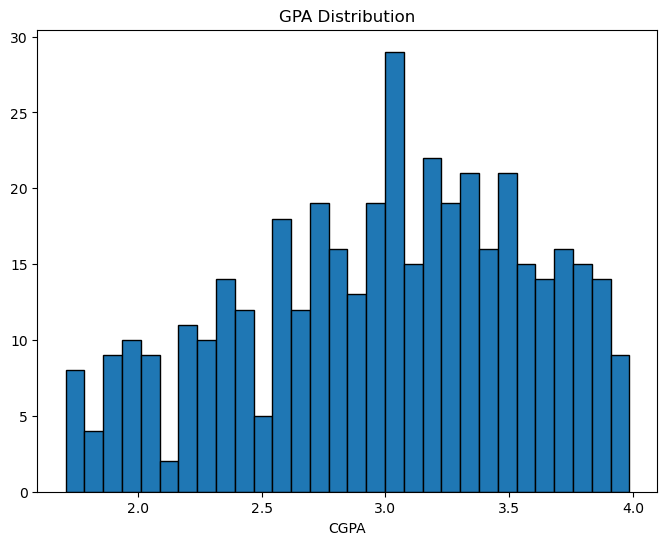

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(df1['CGPA'], bins=30, edgecolor='black')
plt.xlabel('CGPA')
plt.title('GPA Distribution')

* distribution of CGPA

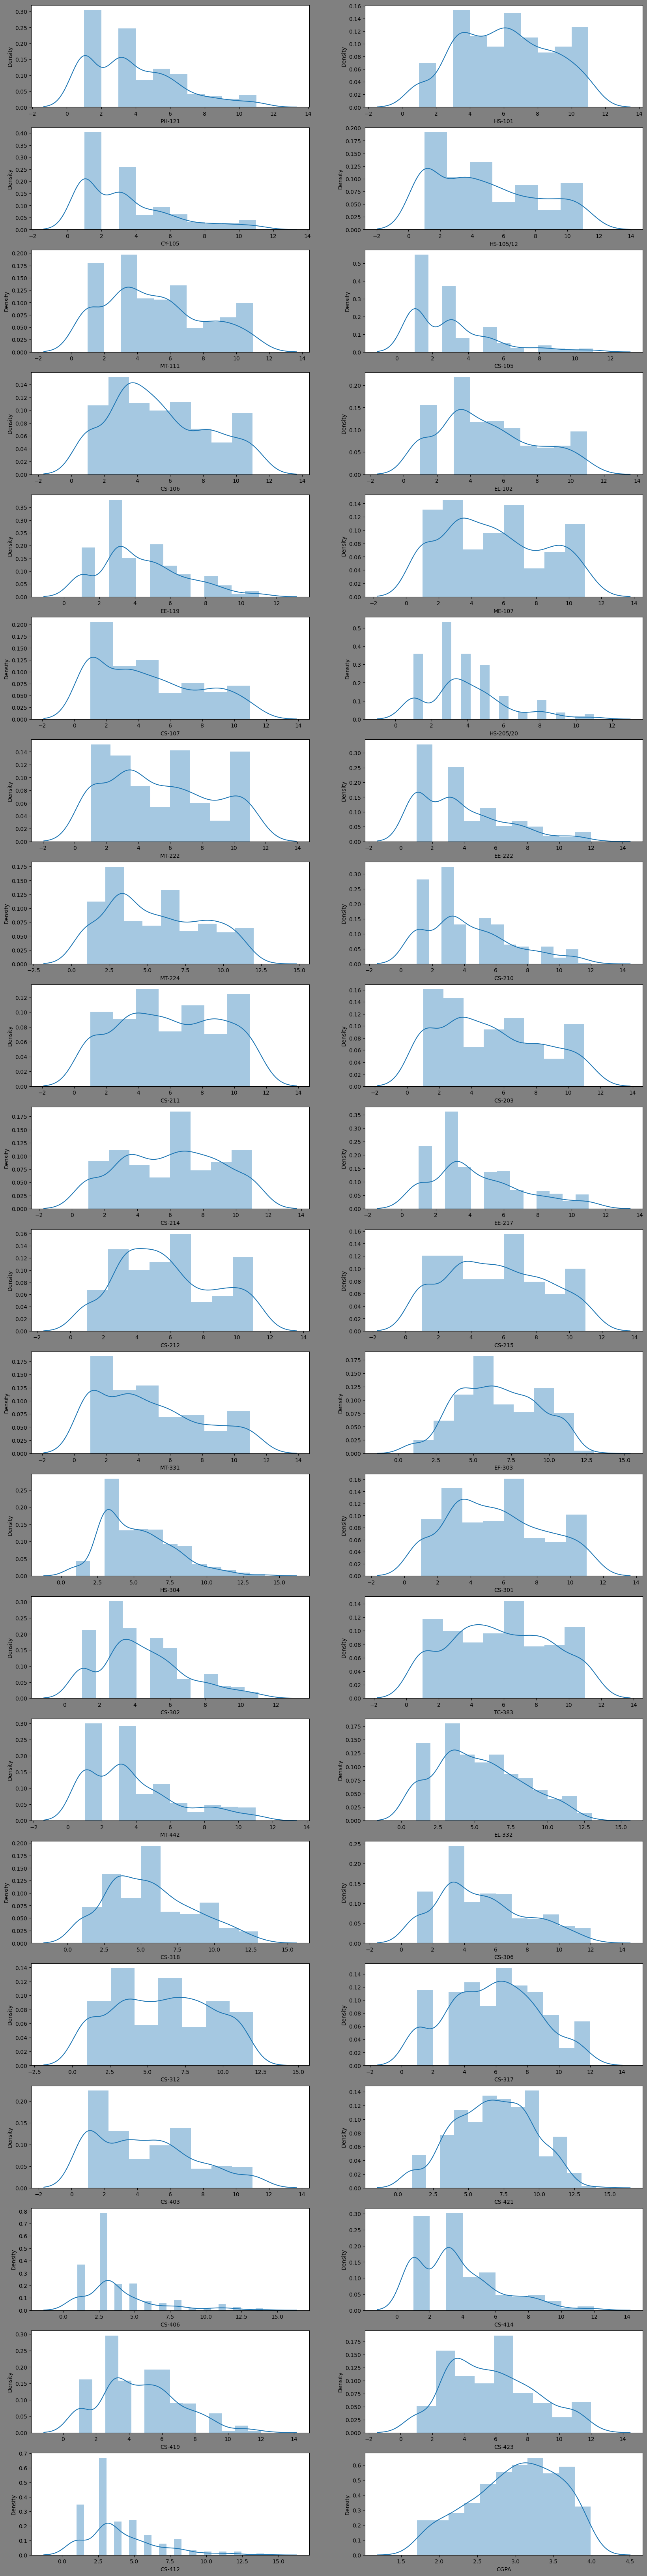

In [12]:
plt.figure(figsize = (20,100), facecolor= 'grey')
pn = 1
for i in df1[:-1]:
    if pn < 43:
        ax= plt.subplot(25, 2, pn)
        sns.distplot(df1[i])
        pn += 1

* i found some littel skewness

In [13]:
df1.skew()

PH-121       0.806797
HS-101       0.046130
CY-105       1.149726
HS-105/12    0.399053
MT-111       0.374625
CS-105       1.319026
CS-106       0.375106
EL-102       0.398226
EE-119       0.575477
ME-107       0.222515
CS-107       0.441389
HS-205/20    0.806428
MT-222       0.245497
EE-222       0.882393
MT-224       0.228839
CS-210       0.692818
CS-211      -0.009854
CS-203       0.314369
CS-214      -0.038186
EE-217       0.685924
CS-212       0.270996
CS-215       0.130011
MT-331       0.487604
EF-303       0.047821
HS-304       0.750273
CS-301       0.221520
CS-302       0.566079
TC-383       0.059427
MT-442       0.934952
EL-332       0.351891
CS-318       0.421151
CS-306       0.452211
CS-312      -0.008498
CS-317       0.044451
CS-403       0.513971
CS-421      -0.092570
CS-406       1.475170
CS-414       0.951974
CS-419       0.411472
CS-423       0.328453
CS-412       1.118183
CGPA        -0.326574
dtype: float64

i apply SQRT method remove the right skewness 

In [14]:
for i in df1.columns[:-1]:
    df1[i] = np.sqrt(df1[i])

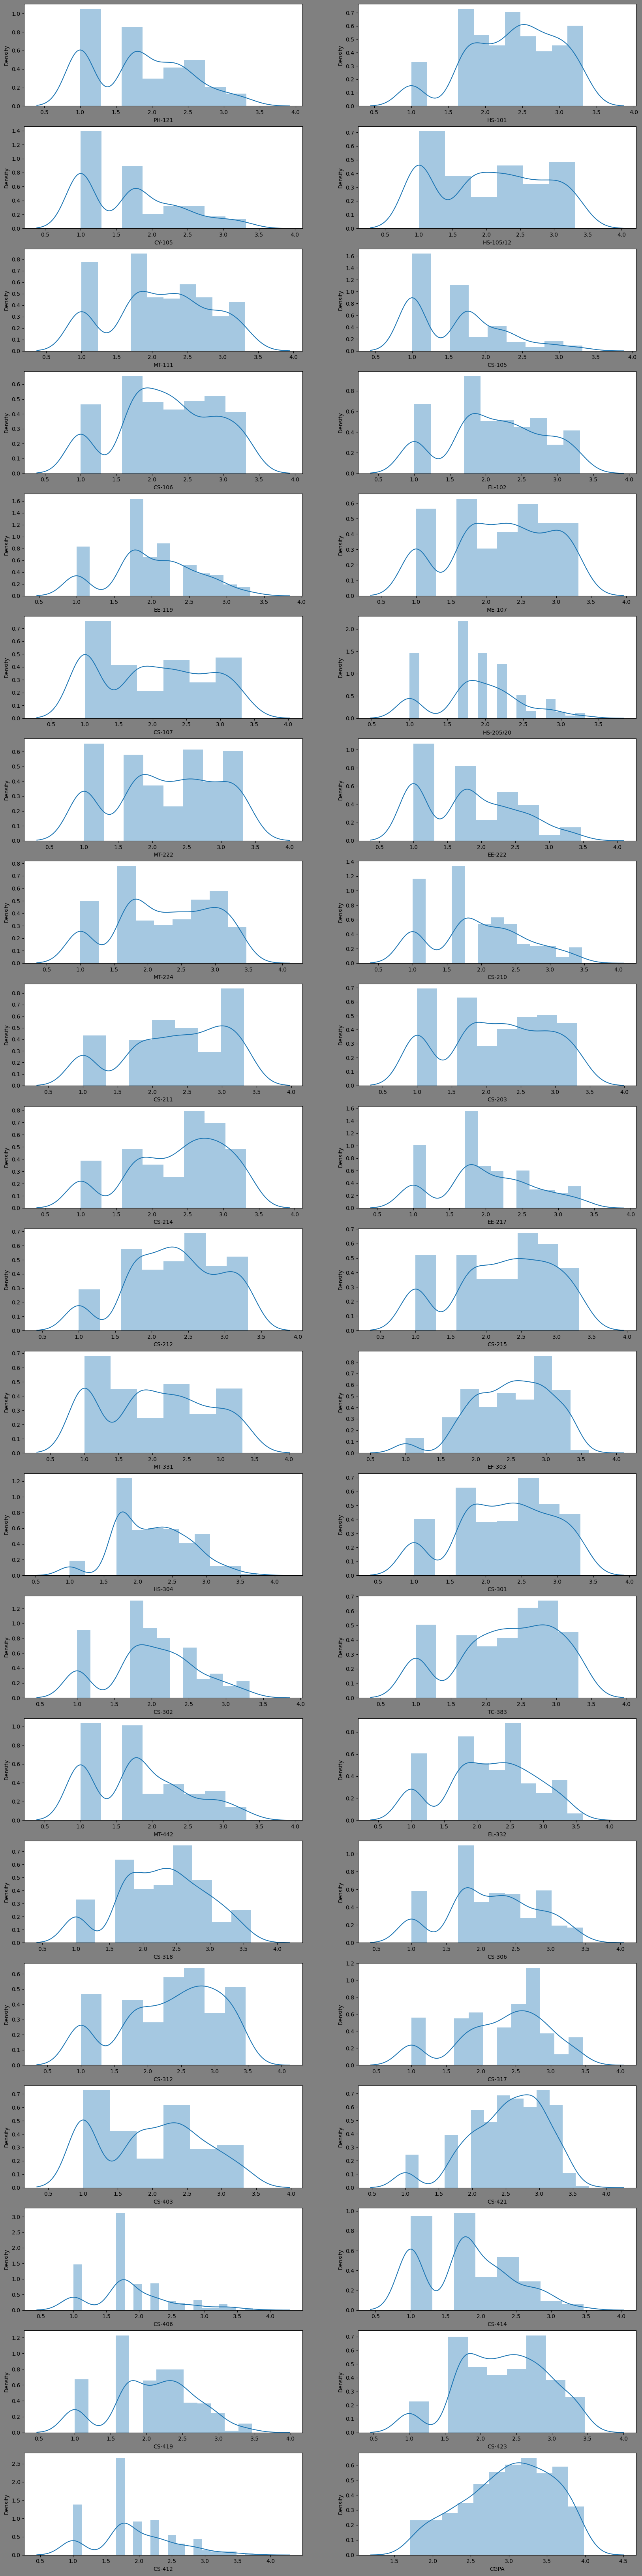

In [15]:
plt.figure(figsize = (20,100), facecolor= 'grey')
pn = 1
for i in df1[:-1]:
    if pn < 43:
        ax= plt.subplot(25, 2, pn)
        sns.distplot(df1[i])
        pn += 1

In [16]:
x = df1.drop('CGPA', axis = 1)
y = df1['CGPA']

In [17]:
from sklearn.preprocessing import StandardScaler
xs = StandardScaler().fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state = 443, test_size = 0.25)

In [19]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
             AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [20]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')

In [21]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 97.04%
train  MSE : 0.0097

 ============ test result ==========
test R2 score: 97.33%
test  MSE : 0.0093

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 0.0000

 ============ test result ==========
test R2 score: 84.78%
test  MSE : 0.0528

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 99.24%
train  MSE : 0.0025

 ============ test result ==========
test R2 score: 94.94%
test  MSE : 0.0176

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 96.15%
train  MSE : 0.0126

 ============ test result ==========
test R2 score: 92.15%
test  MSE : 0.0272

================== GradientBoostingRegressor ==================

 ============ train result ==========
train R2 score: 

In [22]:

from sklearn.model_selection import cross_val_score
for clf in regressor:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xs, y, cv=10) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = r2_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between r2 score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LinearRegression ==================
Cross-Validation Scores: [0.9616192  0.96338996 0.96784159 0.97074261 0.9696096  0.96971474
 0.95423185 0.96865484 0.95858661 0.95168185]
Mean Cross-Validation Score: 0.9636072845688142
Test Accuracy: 0.9733
Difference between r2 score and cross-validation ofLinearRegression() score is 0.009647013650205372

================== DecisionTreeRegressor ==================
Cross-Validation Scores: [0.86810195 0.84199329 0.88259355 0.84454997 0.84430559 0.77280432
 0.86004843 0.79576294 0.82083231 0.88738777]
Mean Cross-Validation Score: 0.8418380125212785
Test Accuracy: 0.8513
Difference between r2 score and cross-validation ofDecisionTreeRegressor() score is 0.009463864626000129

================== RandomForestRegressor ==================
Cross-Validation Scores: [0.94874246 0.95518002 0.94429489 0.92631345 0.95420889 0.94621551
 0.95910075 0.9475534  0.95107247 0.93940281]
Mean Cross-Validation Score: 0.9472084639011987
Test Accuracy: 

* according to the observation SVR, KNeighborsRegressor are the top performing models

In [24]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'],  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'p': [1, 2]}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)  
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [25]:
final = KNeighborsRegressor(algorithm= 'ball_tree', n_neighbors= 9, p= 1, weights ='distance')
final.fit(x_train, y_train)
pred = final.predict(x_test)
acc1 = r2_score(y_test, pred)

In [26]:
print('accuracy score after hyper para meter tuning is {}'.format(acc1 ))

accuracy score after hyper para meter tuning is 0.9838120328635804


In [27]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],  'kernel': ['linear', 'rbf']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [28]:
final1 = SVR(C= 10, gamma=  0.01, kernel= 'rbf')
final1.fit(x_train, y_train)
pred = final.predict(x_test)
acc = r2_score(y_test, pred)
print('accuracy score after hyper para meter tuning is {}'.format(acc))

accuracy score after hyper para meter tuning is 0.9838120328635804


* as by the obesrvation that the max accuracy score can be achived by  both the models is 98%
* by the both models i recommend the KNeighbors regressor because it as less MSE when compared to the MSE of SVR


In [29]:
import joblib
joblib.dump(final, 'grade.pkl')
model1 = joblib.load('grade.pkl')
pred = model1.predict(x_test)
ac = r2_score(y_test, pred)
ac * 100

98.38120328635804